In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='4ADhj130!',
    database='jbg030'
)

cursor = connection.cursor()


# General conversation statistics:
Statistics involving all conversation data

- [Go to Number of conversations](#Number-of-conversations)
- [Go to Descriptive statistics for conversations length](#Descriptive-statistics-for-conversations-length)
- [Go to Distribution of conversations](#Distribution-of-conversations)
- [Go to Distribution of conversation durations](#Distribution-of-conversation-durations)


### Number of conversations

[Back to General conversation statistics](#General-conversation-statistics)


In [3]:
conv_count = "SELECT COUNT(*) FROM conversations"
cursor.execute(conv_count)

num_of_conv = cursor.fetchone()

print("The number of conversations is", num_of_conv[0])


The number of conversations is 1090440


### Descriptive statistics for conversations length

[Back to General conversation statistics](#General-conversation-statistics)


In [4]:
conv_length = "SELECT length FROM conversations"

df = pd.read_sql(conv_length, connection)

descriptive_conv_length_stats = df['length'].describe() # Compute the descriptive statistics

descriptive_conv_length_stats_df = descriptive_conv_length_stats.to_frame().T # Represent it as a data frame

descriptive_conv_length_stats_df = descriptive_conv_length_stats_df.drop(columns="count") # Remove count as we already have it above

descriptive_conv_length_stats_df


/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/1503113398.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(conv_length, connection)


,mean,std,min,25%,50%,75%,max
length,2.581942,1.911941,1.0,2.0,2.0,3.0,89.0


### Distribution of conversations

[Back to General conversation statistics](#General-conversation-statistics)

In [5]:
conv_start = "SELECT start FROM conversations"

df_start = pd.read_sql(conv_start, connection)

df_start['start'] = pd.to_datetime(df_start['start'], unit='ms') # Convert timestamp to a date time format

df_start['hour'] = df_start['start'].dt.hour # Extract the hour when the conv starts

df_start['day_of_month'] = df_start['start'].dt.day # Extract the day of the month

df_start['day_of_week'] = df_start['start'].dt.dayofweek # Extract the day when the conv starts

df_start['month'] = df_start['start'].dt.month # Extract the month when the conv starts

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2723046022.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_start = pd.read_sql(conv_start, connection)


hour
0     28709
1     31041
2     24344
3     31318
4     20186
5     23267
6     31173
7     48569
8     43324
9     48939
10    62266
11    54097
12    55919
13    58759
14    62110
15    60706
16    59776
17    53861
18    52929
19    52131
20    51775
21    52049
22    45144
23    38048
Name: count, dtype: int64


/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


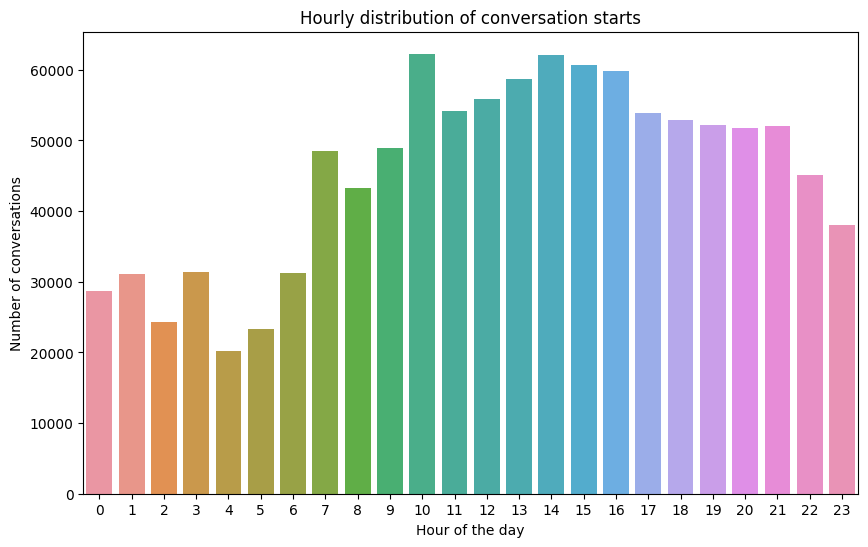

In [6]:
# Hourly distribution of conversation starts

hourly_distribution = df_start['hour'].value_counts().sort_index() # Count the number of conversations starting at each hour

print(hourly_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_distribution.index, y=hourly_distribution.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of conversations')
plt.title('Hourly distribution of conversation starts')
plt.xticks(range(24))
plt.show()

day_of_month
1     37508
2     31665
3     31877
4     27783
5     31722
6     37539
7     38126
8     32162
9     44340
10    32506
11    29710
12    34336
13    43999
14    39441
15    34490
16    45665
17    38272
18    35474
19    35863
20    34304
21    28679
22    30554
23    32318
24    37679
25    40230
26    38985
27    34498
28    36040
29    37378
30    33355
31    23942
Name: count, dtype: int64


/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


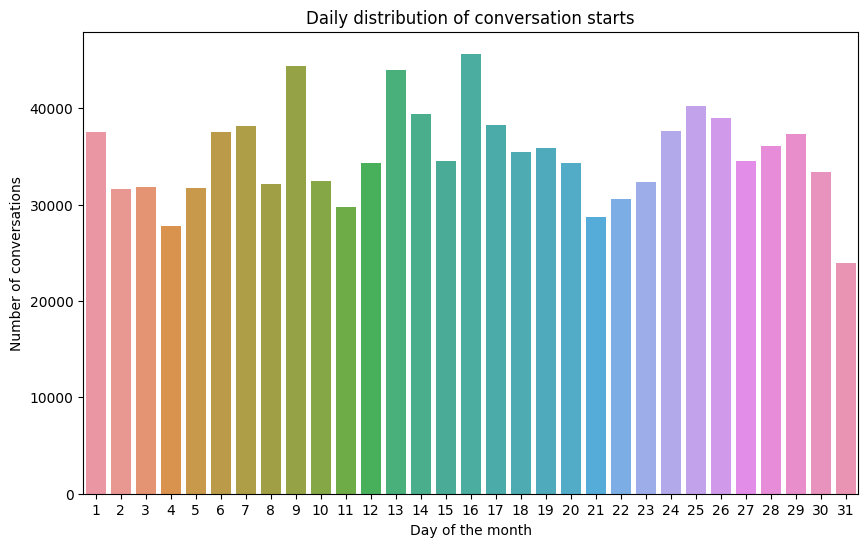

In [7]:
# Daily distribution of conversation starts

daily_distribution = df_start['day_of_month'].value_counts().sort_index() # Count the number of conversations starting on each day of the week

print(daily_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_distribution.index, y=daily_distribution.values)
plt.xlabel('Day of the month')
plt.ylabel('Number of conversations')
plt.title('Daily distribution of conversation starts')
plt.xticks(range(31))
plt.show()

day_of_week
0    167546
1    164922
2    159123
3    158938
4    153778
5    137839
6    148294
Name: count, dtype: int64


/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


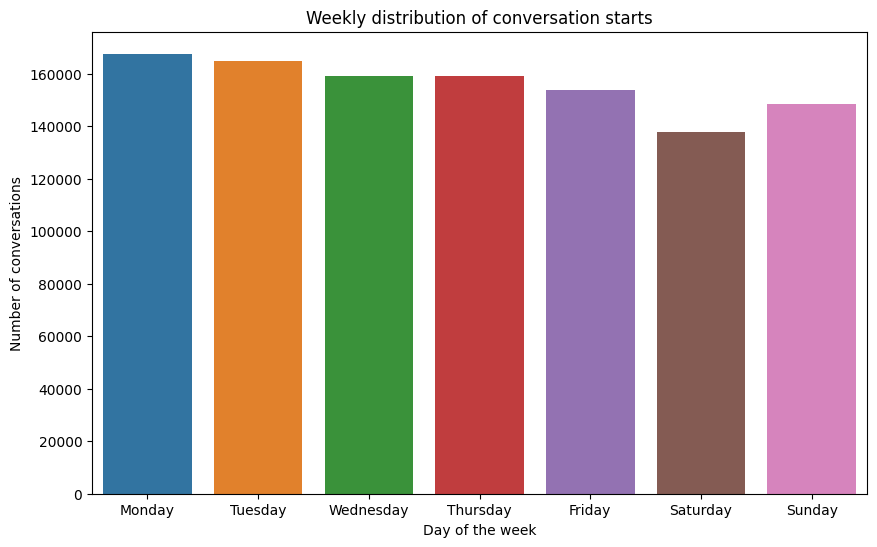

In [8]:
# Weekly distribution of conversation starts 

weekly_distribution = df_start['day_of_week'].value_counts().sort_index() # Count the number of conversations starting on each day of the week

print(weekly_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_distribution.index, y=weekly_distribution.values)
plt.xlabel('Day of the week')
plt.ylabel('Number of conversations')
plt.title('Weekly distribution of conversation starts')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


month
1      85875
2     114695
3     198101
4          0
5      29459
6     117098
7     136533
8     103454
9     100819
10     33533
11     88505
12     82368
Name: count, dtype: int64


/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


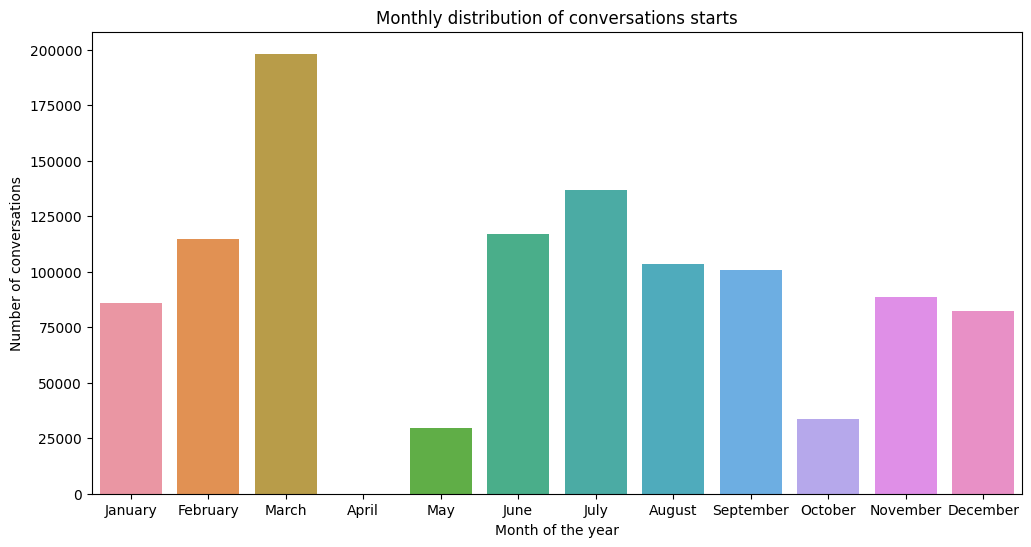

In [9]:
# Monthly distribution of conversations starts by the month of the year

monthly_distribution = df_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() # Count the number of conversations starting on each month
print(monthly_distribution)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_distribution.index, y=monthly_distribution.values)
plt.xlabel('Month of the year')
plt.ylabel('Number of conversations')
plt.title('Monthly distribution of conversations starts')
plt.xticks(range(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

## Distribution of conversation durations

[Back to General conversation statistics](#General-conversation-statistics)

In [10]:
conv_duration = "SELECT start, end FROM conversations"

df_duration = pd.read_sql(conv_duration, connection)

df_duration['start'] = pd.to_datetime(df_duration['start'], unit='ms') # Convert timestamp to date time format
df_duration['end'] = pd.to_datetime(df_duration['end'], unit='ms') # Convert timestamp to date time format

df_duration['duration'] = (df_duration['end'] - df_duration['start']).dt.total_seconds() # Compute the duration of conversations in seconds

duration_desc_stats = df_duration['duration'].describe() # Compute the descriptive statistics of conversations durations
df_duration_desc_stats = duration_desc_stats.to_frame().T
df_duration_desc_stats = df_duration_desc_stats.drop(columns="count")

df_duration_desc_stats

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/3470384928.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_duration = pd.read_sql(conv_duration, connection)


,mean,std,min,25%,50%,75%,max
duration,88725.651566,519318.777093,0.0,356.71175,4854.323,38879.9395,2.641119e+07


/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


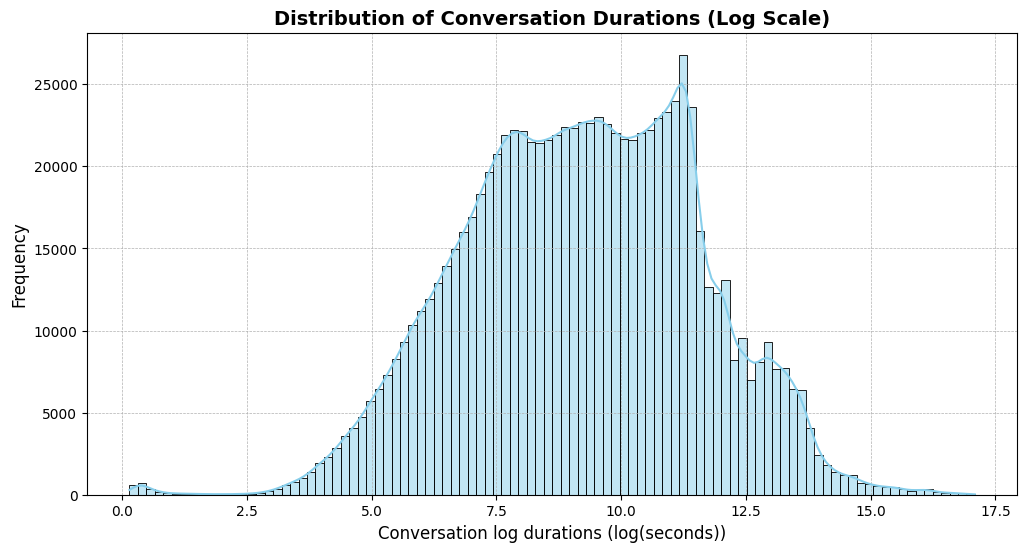

In [11]:
non_zero_durations = df_duration[df_duration['duration'] > 0]['duration'] # Filter out non-zero durations

log_durations = np.log1p(non_zero_durations) # Add a small constant befor log transformations to handle near-zero values more effectively

plt.figure(figsize=(12, 6))
sns.histplot(log_durations, bins=100, kde=True, color='skyblue')
plt.xlabel('Conversation log durations (log(seconds))', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Conversation Durations (Log Scale)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Airline specific conversation statistics
Statistics involving our sppecific airline and our competitors

- [Go to Airline specific number of conversations](#Airline-specific-number-of-conversations)
- [Go to Airline specific descriptive statistics for conversation length](#Airline-specific-descriptive-statistics-for-conversation-length)
- [Go to Airline specific distribution of conversations](#Airline-specific-distribution-of-conversations)



### Airline specific number of conversations

[Back to Airline specific conversation statistics](#Airline-specific-conversation-statistics)

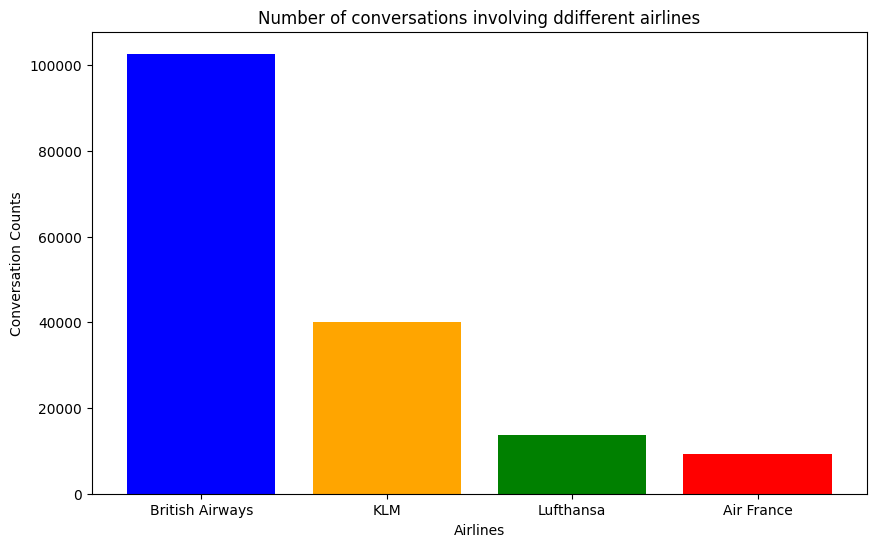

In [12]:
brit_airways_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%British_Airways%';
"""
KLM_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%KLM%';
"""
lufthansa_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%Lufthansa%';
"""
air_france_conv_count_query = """ 
SELECT COUNT(*)
FROM conversations
WHERE airline LIKE '%AirFrance%';
"""
def get_count(query):
    cursor = connection.cursor()
    cursor.execute(query)
    result = cursor.fetchone()
    return result[0]

brit_airways_conv_count = get_count(brit_airways_conv_count_query)
KLM_conv_count = get_count(KLM_conv_count_query)
lufthansa_conv_count = get_count(lufthansa_conv_count_query)
air_france_conv_count = get_count(air_france_conv_count_query)

airlines = ['British Airways', 'KLM', 'Lufthansa', 'Air France']
counts = [brit_airways_conv_count, KLM_conv_count, lufthansa_conv_count, air_france_conv_count]

plt.figure(figsize=(10, 6))
plt.bar(airlines, counts, color=['blue', 'orange', 'green', 'red'])

plt.title('Number of conversations involving ddifferent airlines')
plt.xlabel('Airlines')
plt.ylabel('Conversation Counts')

plt.show()

### Airline specific descriptive statistics for conversation length

[Back to Airline specific conversation statistics](#Airline-specific-conversation-statistics)

In [13]:
def compute_descriptive_stats(query, connection):
    df = pd.read_sql(query, connection)

    descriptive_stats = df['length'].describe() # Compute descriptive statistics

    descriptive_stats_df = descriptive_stats.to_frame().T # Convert to a data frame

    return descriptive_stats_df


In [14]:
british_airways_conv_length_query = """
SELECT length 
FROM conversations 
WHERE airline LIKE '%British_Airways%'
"""
KLM_conv_length_query = """ 
SELECT length
FROM conversations
WHERE airline LIKE '%KLM%';
"""
lufthansa_conv_length_query = """ 
SELECT length
FROM conversations
WHERE airline LIKE '%Lufthansa%';
"""
air_france_conv_length_query = """ 
SELECT length
FROM conversations
WHERE airline LIKE '%AirFrance%';
"""

descriptive_british_airways_conv_length_stats_df = compute_descriptive_stats(british_airways_conv_length_query, connection)
descriptive_KLM_conv_length_stats_df = compute_descriptive_stats(KLM_conv_length_query, connection)
descriptive_lufthansa_conv_length_stats_df = compute_descriptive_stats(lufthansa_conv_length_query, connection)
descriptive_air_france_conv_length_stats_df = compute_descriptive_stats(air_france_conv_length_query, connection)

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2978879652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2978879652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2978879652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y

In [15]:
descriptive_british_airways_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,102638.0,3.211754,1.976621,1.0,2.0,2.0,4.0,44.0


In [16]:
descriptive_KLM_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,40144.0,3.42081,2.337621,1.0,2.0,3.0,4.0,54.0


In [17]:
descriptive_air_france_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,9305.0,2.933799,1.842207,1.0,2.0,2.0,3.0,29.0


In [18]:
descriptive_lufthansa_conv_length_stats_df

,count,mean,std,min,25%,50%,75%,max
length,13683.0,3.39582,1.904883,1.0,2.0,3.0,4.0,19.0


### Airline specific distribution of conversations

[Back to Airline specific conversation statistics](#Airline-specific-conversation-statistics)

In [19]:
def extract_time(query, connection):

    df = pd.read_sql(query, connection)

    df['start'] = pd.to_datetime(df['start'], unit='ms') # Convert timestamp to a date time format

    df['hour'] = df['start'].dt.hour # Extract the hour when the conv starts

    df['day_of_week'] = df['start'].dt.dayofweek # Extract the day when the conv starts

    df['month'] = df['start'].dt.month # Extract the month when the conv starts

    df['day_of_month'] = df['start'].dt.day # Extract the day of the month

    return df
    

In [20]:
british_airways_conv_start_query = """
SELECT start 
FROM conversations
WHERE airline LIKE '%British_Airways%'
"""
KLM_conv_start_query = """ 
SELECT start
FROM conversations
WHERE airline LIKE '%KLM%';
"""
lufthansa_conv_start_query = """ 
SELECT start
FROM conversations
WHERE airline LIKE '%Lufthansa%';
"""
air_france_conv_start_query = """ 
SELECT start
FROM conversations
WHERE airline LIKE '%AirFrance%';
"""

In [21]:
british_airways_conv_start = extract_time(british_airways_conv_start_query, connection)
KLM_conv_start = extract_time(KLM_conv_start_query, connection)
lufthansa_conv_start = extract_time(lufthansa_conv_start_query, connection)
air_france_conv_start = extract_time(air_france_conv_start_query, connection)


/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2465998381.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2465998381.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_88915/2465998381.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y